In [26]:
import numpy as np

def parse_logs(name):
    f = open(name, "r")
    line = f.readline()
    line = f.readline()


    train_accuracy_= []
    test_accuracy_= [] 
    test_robust36_= [] 
    time_= []

    while(len(line) > 0):
        line = f.readline()
        vals = line.split('\t')
        if len(vals) < 11:
            break
        train_accuracy_.append(float(vals[5]))
        test_accuracy_.append(float(vals[7]))
        test_robust36_.append(float(vals[8]))
        time_.append(float(vals[1]))

    return train_accuracy_, test_accuracy_, test_robust36_, time_


In [72]:
train_accuracy = []
test_accuracy = []
test_robust36 = []
time = []
file_name = []

#num_terms = [1,2,3,4,5,10,12]

In [73]:
import os

#path = "/home/alexander/HSE/matexp_approximation/SOC/logs/standard_Lip5_CIFAR10"

path = '/home/alexander/HSE/matexp_approximation/SOC/EXP/same_orth_exp/logs'

for file in sorted(os.listdir(path)):

    # if "shed" not in file:
    #     continue 

    if file not in ["output_arnoldi_shed4.log", "output_arnoldi_float32_4_8.log"]:
        continue

    path_to_file = os.path.join(path, file)
    train_accuracy_, test_accuracy_, test_robust36_, time_ = parse_logs(path_to_file)
    train_accuracy.append(train_accuracy_)
    test_accuracy.append(test_accuracy_)
    test_robust36.append(test_robust36_)
    file_name.append(file)
    time.append(time_)

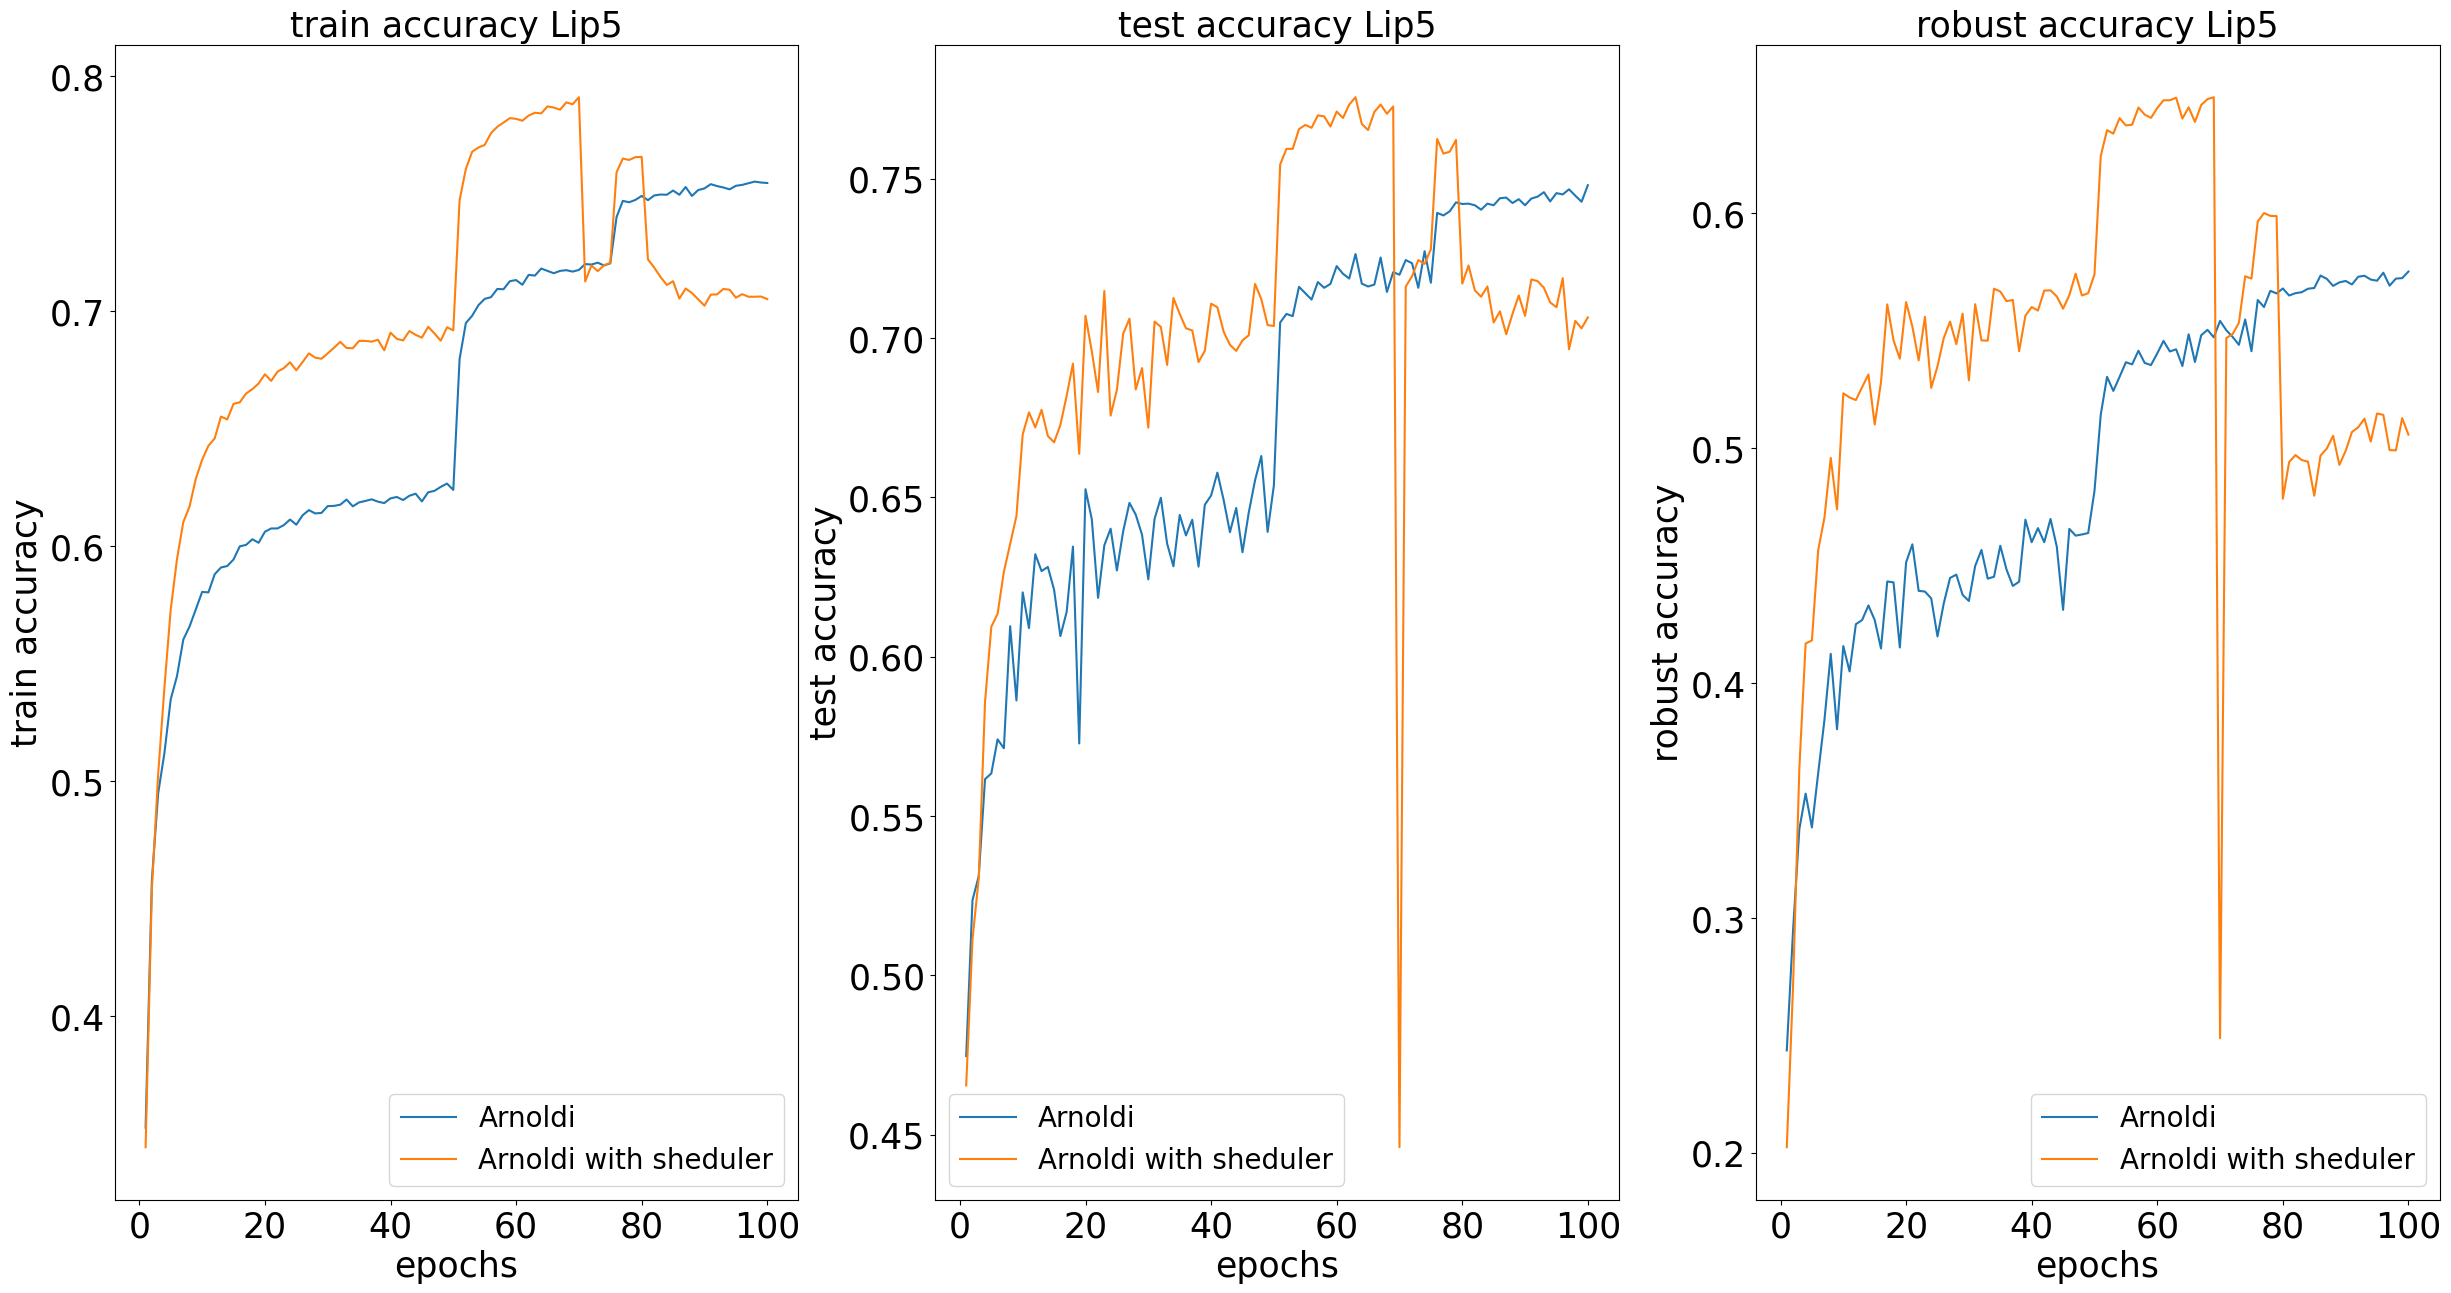

In [76]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 3, figsize=(30,15))

N=100

# line, = ax[0].plot(num_terms, time, marker='o')
# ax[0].set_xlabel("number of terms in train")
# ax[0].set_ylabel("per epoch time in seconds")
# ax[0].set_title('standard Lip5 k-k terms')

ax[0].set_xlabel("epochs", **font)
ax[0].set_ylabel("train accuracy", **font)
ax[0].set_title('train accuracy Lip5', **font)

labels = ["Arnoldi", "Arnoldi with sheduler"]

for i, train_accuracy_ in enumerate(train_accuracy):

    line, = ax[0].plot(list(range(1,N+1)), train_accuracy_[:N], label = labels[i])

ax[0].legend(prop={'size': 20})#loc='lower left'


ax[1].set_xlabel("epochs", **font)
ax[1].set_ylabel("test accuracy", **font)
ax[1].set_title('test accuracy Lip5', **font)

for i, test_accuracy_ in enumerate(test_accuracy):

    line, = ax[1].plot(list(range(1,N+1)), test_accuracy_[:N], label = labels[i])

ax[1].legend(prop={'size': 20})


ax[2].set_xlabel("epochs", **font)
ax[2].set_ylabel("robust accuracy", **font)
ax[2].set_title('robust accuracy Lip5', **font)

for i, robust_accuracy_ in enumerate(test_robust36):

    line, = ax[2].plot(list(range(1,N+1)), robust_accuracy_[:N], label = labels[i])

ax[2].legend(prop={'size': 20})

for i in range(3):
    ax[i].xaxis.set_tick_params(labelsize=25)
    ax[i].yaxis.set_tick_params(labelsize=25)

plt.show()

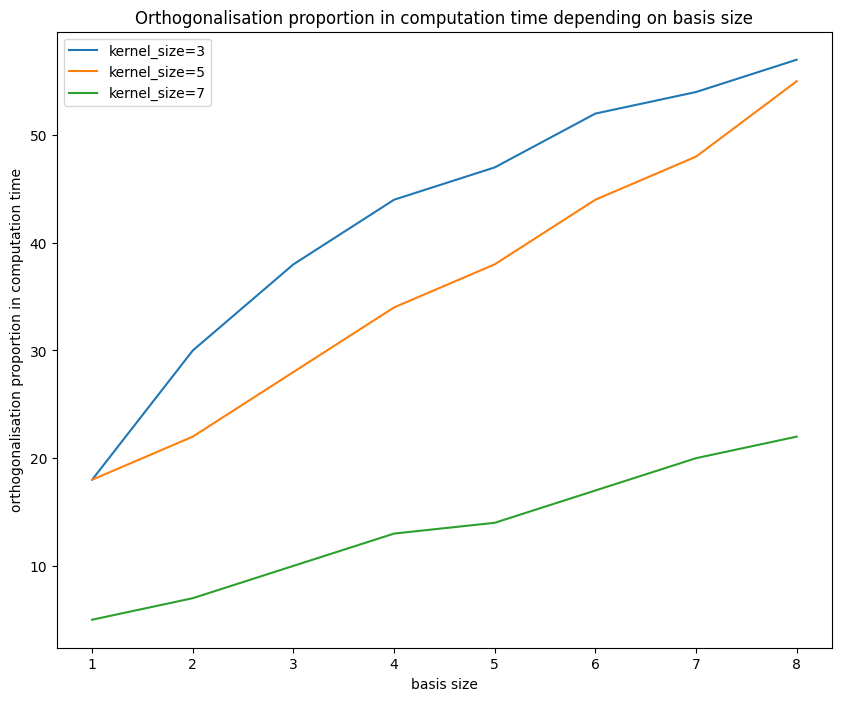

In [5]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 1, figsize=(10,8))

x = list(range(1,9))

y3 = [18, 30, 38, 44, 47, 52, 54, 57]
y5 = [18, 22, 28, 34, 38, 44, 48, 55]
y7 = [5, 7, 10, 13, 14, 17, 20, 22]

ax.set_xlabel("basis size")
ax.set_ylabel("orthogonalisation proportion in computation time")
ax.set_title('Orthogonalisation proportion in computation time depending on basis size')

line, = ax.plot(x, y3, label = "kernel_size=3")
line, = ax.plot(x, y5, label = "kernel_size=5")
line, = ax.plot(x, y7, label = "kernel_size=7")

ax.legend()


In [62]:
font = {'size'   : 25}

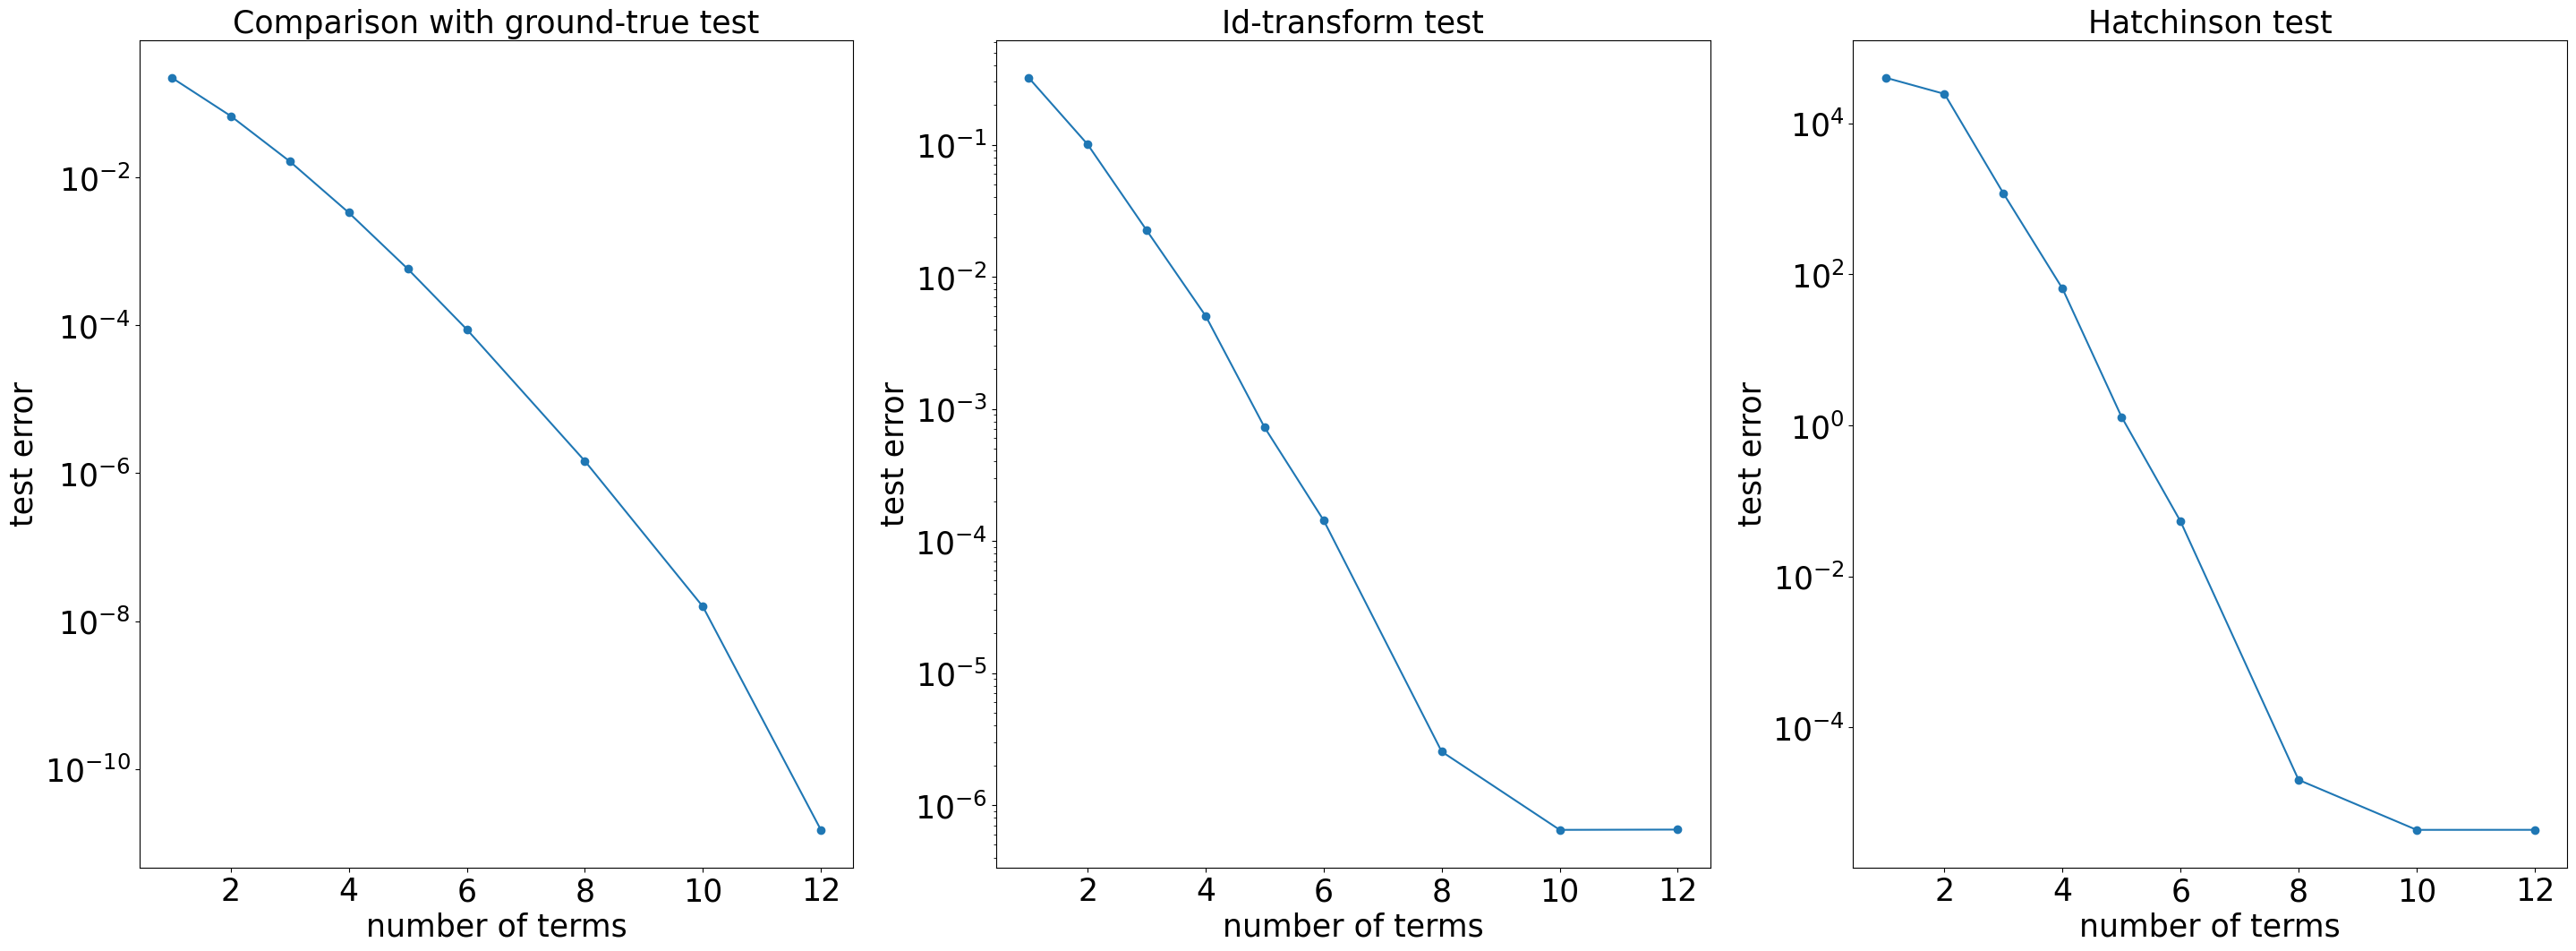

In [25]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 3, figsize=(35,12))

x = list(range(1,12))

#torch.Size([128, 64, 16, 16])

#1...6 8 10 12

x = [1,2,3,4,5,6,8,10,12]

y_exp = [0.22574707865715027, 0.06837625801563263, 0.016638223081827164, 0.0033640882465988398, 0.0005829842411912978, 8.854707994032651e-05, 1.4668596577394055e-06, 1.5707961154021177e-08, 1.493084648973575e-11]
y_ort = [0.3220735490322113, 0.10062675923109055, 0.02250160090625286, 0.005056215450167656, 0.0007221470586955547, 0.00014307988749351352, 2.5369733975821873e-06, 6.48405546144204e-07, 6.514901542686857e-07]
y_hatch = [40257.80625, 24514.3796875, 1173.6263671875, 64.5399658203125, 1.295362949371338, 0.05337908267974854, 2.0172298536635936e-05, 4.396447548060678e-06, 4.401505793794058e-06]

for i in range(3):

    ax[i].set_xlabel("number of terms", **font)
    ax[i].set_ylabel("test error", **font)

    if i == 0:
        ax[i].set_title('Comparison with ground-true test', **font)
    elif i == 1:
        ax[i].set_title('Id-transform test', **font)
    elif i == 2:
        ax[i].set_title('Hatchinson test', **font)

    ax[i].xaxis.set_tick_params(labelsize=25)
    ax[i].yaxis.set_tick_params(labelsize=25)

    ax[i].set_yscale('log')


line, = ax[0].plot(x, y_exp, marker='o')
line, = ax[1].plot(x, y_ort, marker='o')
line, = ax[2].plot(x, y_hatch, marker='o')

#ax.legend()